![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# New York City Airbnb Open Data

Let's put in practice the topics covered in the course and analyze Airbnb listings data.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the `airbnb_data` dataset into a `airbnb_df` DataFrame variable.

This data file includes all needed information to find out more about hosts and geographical availability.

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

Here's a preview of that file:

In [2]:
!head data/airbnb_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


The column names are taken from the original documentation for this dataset.

In [129]:
# your code goes here

airbnb_df = pd.read_csv('data/airbnb_data.csv')
airbnb_df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


In [5]:
airbnb_df.shape

(1060, 14)

In [6]:
airbnb_df.describe()

,listing_id,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,1060.000000,1.060000e+03,1060.000000,1060.000000,1017.000000,1060.000000
mean,188418.680189,7.809580e+05,9.534906,78.827358,0.920924,2.324528
std,126514.795934,8.012998e+05,24.985845,87.516805,0.959080,4.291367
min,2539.000000,0.000000e+00,1.000000,0.000000,0.010000,1.000000
25%,63684.000000,2.020110e+05,2.000000,15.000000,0.220000,1.000000
50%,192090.000000,5.731905e+05,3.000000,46.000000,0.590000,1.000000
75%,283113.500000,1.313306e+06,6.000000,115.250000,1.320000,2.000000
max,442649.000000,1.060985e+07,365.000000,480.000000,7.140000,28.000000


In [27]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      1060 non-null   int64  
 1   listing_name                    1060 non-null   object 
 2   host_id                         1060 non-null   int64  
 3   host_name                       1059 non-null   object 
 4   neighbourhood_group             1060 non-null   object 
 5   lat_lon                         1060 non-null   object 
 6   room_type                       1060 non-null   object 
 7   price                           1060 non-null   object 
 8   minimum_nights                  1060 non-null   int64  
 9   number_of_reviews               1060 non-null   int64  
 10  last_review                     1017 non-null   object 
 11  reviews_per_month               1017 non-null   float64
 12  calculated_host_listings_count  10

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Setting `airbnb_data` index.

Set the index of the DataFrame to the `listing_id` column.

In [130]:
# your code goes here

airbnb_df.set_index('listing_id', inplace = True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking missing data

We need to check if our `airbnb_data` has any null value. 

To do that, let's create a `percent_missing` Series containing the column names and the percent of missing values per column.

In [131]:
# your code goes here
#(airbnb_df['last_review'].isna().sum() / airbnb_df.shape[0]) * 100

for col in airbnb_df.columns:
    percent_missing = (airbnb_df[col].isna().sum() / airbnb_df.shape[0]) * 100
    print(col + '==>' + percent_missing.astype('str') + '%')


listing_name==>0.0%
host_id==>0.0%
host_name==>0.09433962264150944%
neighbourhood_group==>0.0%
lat_lon==>0.0%
room_type==>0.0%
price==>0.0%
minimum_nights==>0.0%
number_of_reviews==>0.0%
last_review==>4.056603773584905%
reviews_per_month==>4.056603773584905%
calculated_host_listings_count==>0.0%
availability_365==>0.0%


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `last_review` missing values

Impute null values in the `last_review` column with a `0` value.

In [132]:
# your code goes here
airbnb_df.loc[airbnb_df['last_review'].isna(), 'last_review'] = 0

#airbnb_df['last_review'].fillna(0, inplace=True) ==> would have also solved it

In [133]:
airbnb_df.head(3)

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,0,NaN,1,365


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_name` missing values

Drop the rows where `host_name` has a missing value.

In [135]:
# your code goes here
airbnb_df.dropna(subset=['host_name'], inplace=True)

In [136]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 2539 to 442649
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_name                    1059 non-null   object 
 1   host_id                         1059 non-null   int64  
 2   host_name                       1059 non-null   object 
 3   neighbourhood_group             1059 non-null   object 
 4   lat_lon                         1059 non-null   object 
 5   room_type                       1059 non-null   object 
 6   price                           1059 non-null   object 
 7   minimum_nights                  1059 non-null   int64  
 8   number_of_reviews               1059 non-null   int64  
 9   last_review                     1059 non-null   object 
 10  reviews_per_month               1016 non-null   float64
 11  calculated_host_listings_count  1059 non-null   int64  
 12  availability_365             

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `reviews_per_month` missing values

Drop the rows where `reviews_per_month` has a missing value.

In [137]:
# your code goes here
airbnb_df.dropna(subset=['reviews_per_month'], inplace = True)
airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 2539 to 442649
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_name                    1016 non-null   object 
 1   host_id                         1016 non-null   int64  
 2   host_name                       1016 non-null   object 
 3   neighbourhood_group             1016 non-null   object 
 4   lat_lon                         1016 non-null   object 
 5   room_type                       1016 non-null   object 
 6   price                           1016 non-null   object 
 7   minimum_nights                  1016 non-null   int64  
 8   number_of_reviews               1016 non-null   int64  
 9   last_review                     1016 non-null   object 
 10  reviews_per_month               1016 non-null   float64
 11  calculated_host_listings_count  1016 non-null   int64  
 12  availability_365             

In [ ]:
#alternative solution:
airbnb_df = airbnb_df.loc[airbnb_df['reviews_per_month'].notna()]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_id` invalid values

Drop the rows where `host_id` has a `0` value.

In [138]:
# your code goes here

airbnb_df.drop(airbnb_df[airbnb_df['host_id'] == 0].index)

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767;-73.975,Entire home/apt,"$200,00.-",3,74,22/6/19,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437352,Fantastic 2BR in Brooklyn's Best Area,290662,Seth,"Park Slope, Brooklyn",40.67078;-73.98815,Entire home/apt,"$105,00.-",115,15,31/12/18,0.17,1,219
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,"Prospect-Lefferts Gardens, Brooklyn",40.65814;-73.96181,Entire home/apt,"$150,00.-",3,87,16/6/19,1.00,1,73
439750,Perfect apt. above L train Graham stop,1566042,Haley,"Williamsburg, Brooklyn",40.71517;-73.94292,Private room,"$55,00.-",150,10,19/5/18,0.14,1,97


In [ ]:
#alternative solution
airbnb_df = airbnb_df.loc[airbnb_df['host_id'] != 0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Now cast this `last_review` column to `datetime`

In [139]:
# your code goes here
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
airbnb_df['last_review'].dtype

dtype('<M8[ns]')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Duplicated listings

Many listings could be duplicated. Drop all the entries that have the same `listing_name`, `price` and `room_type`. Keep just the last entry.

In [140]:
# your code goes here
airbnb_df.drop_duplicates(keep='last', subset=['listing_name', 'price', 'room_type'])


,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,2019-05-21,0.38,2,355
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,2019-05-07,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767;-73.975,Entire home/apt,"$200,00.-",3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437906,GREAT 1BR/2BA TERRACE & W/D! in EV!,0,Ralph,"East Village, Manhattan",40.728;-73.97903,Entire home/apt,"$350,00.-",5,4,2015-07-10,0.07,1,0
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,"Prospect-Lefferts Gardens, Brooklyn",40.65814;-73.96181,Entire home/apt,"$150,00.-",3,87,2019-06-16,1.00,1,73
439750,Perfect apt. above L train Graham stop,1566042,Haley,"Williamsburg, Brooklyn",40.71517;-73.94292,Private room,"$55,00.-",150,10,2018-05-19,0.14,1,97


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Invalid `price`

Check the `price`. It should be a numeric type column.

- Remove the `$`, `.` and `-` characters.
- Replace `,` with a `.` character.
- Cast the column to `float` dtype.

In [141]:
# your code goes here
airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
airbnb_df['price'] = airbnb_df['price'].str.replace('-', '')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '.')


airbnb_df['price'] = airbnb_df['price'].str.replace('.','')
airbnb_df['price'] = pd.to_numeric(airbnb_df['price'])
airbnb_df['price'] = airbnb_df['price'].astype('float')
airbnb_df.style.format({'price':"{:,d}"})
airbnb_df['price']


C:\Users\LIZEGB~1\AppData\Local\Temp/ipykernel_30512/3170183020.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
C:\Users\LIZEGB~1\AppData\Local\Temp/ipykernel_30512/3170183020.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_df['price'] = airbnb_df['price'].str.replace('.','')


listing_id
2539      14900.0
2595      22500.0
3831       8900.0
5022       8000.0
5099      20000.0
           ...   
437906    35000.0
438513    15000.0
439750     5500.0
442636     7700.0
442649    12500.0
Name: price, Length: 1016, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `neighbourhood_group` column

Check the `neighbourhood_group` column. It should be divided into two different columns: `neighbourhood` and `borough`.

After the split, drop the `neighbourhood_group` column.

In [142]:
# your code goes here
airbnb_df['borough'] = airbnb_df['neighbourhood_group'].str.split(',', expand=True)[1]


In [143]:
airbnb_df['borough']

listing_id
2539        Brooklyn
2595       Manhattan
3831        Brooklyn
5022       Manhattan
5099       Manhattan
             ...    
437906     Manhattan
438513      Brooklyn
439750      Brooklyn
442636        Queens
442649     Manhattan
Name: borough, Length: 1016, dtype: object

In [144]:
airbnb_df.head()

,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,borough
listing_id,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,14900.0,1,9,2018-10-19,0.21,6,365,Brooklyn
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,22500.0,1,45,2019-05-21,0.38,2,355,Manhattan
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,8900.0,1,270,2019-05-07,4.64,1,194,Brooklyn
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,8000.0,10,9,2018-11-19,0.10,1,0,Manhattan
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767;-73.975,Entire home/apt,20000.0,3,74,2019-06-22,0.59,1,129,Manhattan


In [145]:
airbnb_df.drop(['neighbourhood_group'], axis = 1, inplace=True)

In [146]:
airbnb_df.head(2)

,listing_name,host_id,host_name,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,borough
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,40.64749;-73.97237,Private room,14900.0,1,9,2018-10-19,0.21,6,365,Brooklyn
2595,Skylit Midtown Castle,2845,Jennifer,40.75362;-73.98377,Entire home/apt,22500.0,1,45,2019-05-21,0.38,2,355,Manhattan


In [147]:
col = airbnb_df.pop('borough')
airbnb_df.insert(3,col.name,col)
airbnb_df

,listing_name,host_id,host_name,borough,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,40.64749;-73.97237,Private room,14900.0,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,40.75362;-73.98377,Entire home/apt,22500.0,1,45,2019-05-21,0.38,2,355
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,40.68514;-73.95976,Entire home/apt,8900.0,1,270,2019-05-07,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,40.79851;-73.94399,Entire home/apt,8000.0,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,40.74767;-73.975,Entire home/apt,20000.0,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437906,GREAT 1BR/2BA TERRACE & W/D! in EV!,0,Ralph,Manhattan,40.728;-73.97903,Entire home/apt,35000.0,5,4,2015-07-10,0.07,1,0
438513,Big Beautiful Brooklyn Apt @ Park!,2177462,Marc,Brooklyn,40.65814;-73.96181,Entire home/apt,15000.0,3,87,2019-06-16,1.00,1,73
439750,Perfect apt. above L train Graham stop,1566042,Haley,Brooklyn,40.71517;-73.94292,Private room,5500.0,150,10,2018-05-19,0.14,1,97


In [148]:
col.name

'borough'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `lat_lon` column

Create two new columns `latitude` and `longitude` containing the product of splitting the `lat_lon` column. Both new columns should be casted to `float` dtype.

After the split, drop the `lat_lon` column.

In [150]:
# your code goes here
airbnb_df['latitude'] = airbnb_df['lat_lon'].str.split(';', expand=True)[0].astype('float')
airbnb_df['longitude'] = airbnb_df['lat_lon'].str.split(';', expand=True)[1].astype('float')


In [153]:
col_lat = airbnb_df.pop('latitude')
col_lon = airbnb_df.pop('longitude')

airbnb_df.insert(4, col_lat.name, col_lat)
airbnb_df.insert(5, col_lon.name, col_lon)

airbnb_df.drop(['lat_lon'], axis = 1, inplace = True)

In [155]:
airbnb_df.head(2)

,listing_name,host_id,host_name,borough,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,40.64749,-73.97237,Private room,14900.0,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,22500.0,1,45,2019-05-21,0.38,2,355


#### Visualizing points on a map

Let's visualize your `airbnb_df` to confirm everything is in correct format so far.

Execute the below code to visualize the `latitude` and `longitude` you just created.

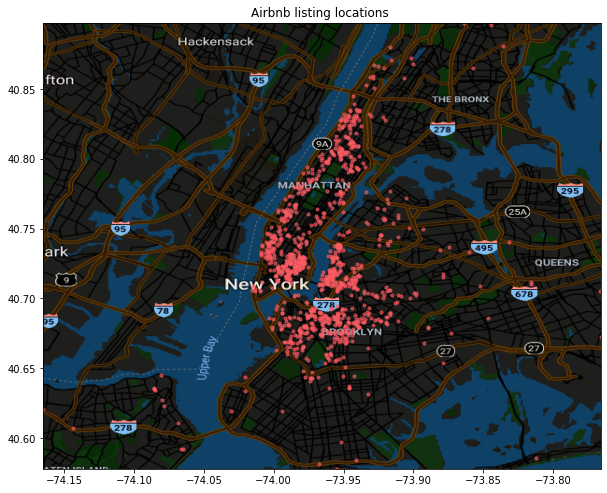

In [156]:
longlat_min_max = (airbnb_df.longitude.min(), airbnb_df.longitude.max(), airbnb_df.latitude.min(), airbnb_df.latitude.max())

nyc = plt.imread('./data/nyc-map.png')

fig, ax = plt.subplots(figsize=(10,9))

ax.scatter(airbnb_df.longitude, airbnb_df.latitude, zorder=1, alpha=0.6, c='#fd5c63', s=10)
ax.set_title('Airbnb listing locations ')
ax.imshow(nyc, extent=longlat_min_max);

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing `availability_365` values

This columns should casted to numeric dtype, but it has many invalid string values, like `43+N524`, that should be coerced while casting.

Also we can see many values out of domain, let's fix them:
- Negative numbers, that should be converted to positive.
- Numbers above 365, that should be dropped.

In [159]:
airbnb_df['availability_365'] = pd.to_numeric(airbnb_df['availability_365'], errors = 'coerce')

In [160]:
airbnb_df['availability_365'].unique()

array([ 3.650e+02,  3.550e+02,  1.940e+02,  0.000e+00,  1.290e+02,
        2.200e+02,  1.880e+02,  6.000e+00,  3.900e+01,  3.140e+02,
        3.330e+02,  4.600e+01,  3.210e+02,  1.200e+01,  2.100e+01,
        3.040e+02,  3.470e+02,  3.640e+02,  2.330e+02,  8.500e+01,
        7.500e+01,  3.110e+02,  6.700e+01,  2.550e+02,  2.840e+02,
        3.590e+02,  2.690e+02,  3.400e+02,  2.200e+01,  9.600e+01,
        3.450e+02,  2.730e+02,  3.454e+03,  9.500e+01,  2.150e+02,
        2.650e+02,  1.920e+02,  2.510e+02,  3.020e+02,  1.400e+02,
        2.340e+02,  2.570e+02,  3.000e+01,  3.010e+02,  2.940e+02,
        3.200e+02,  1.540e+02,  5.234e+03,  1.800e+02,  2.310e+02,
        2.970e+02,  2.920e+02,  1.910e+02,  7.200e+01,  3.620e+02,
        3.360e+02,  1.160e+02,  8.800e+01,  2.240e+02,  3.220e+02,
        3.240e+02,  1.320e+02,  2.950e+02,  2.380e+02,  2.090e+02,
        3.280e+02,  3.800e+01,  7.000e+00,  2.720e+02,  2.600e+01,
        2.880e+02,  3.170e+02,  2.070e+02,  1.850e+02,  1.580e

In [161]:
# your code goes here

airbnb_df['availability_365'] = np.abs(airbnb_df['availability_365'])

In [186]:
airbnb_df.loc[airbnb_df['availability_365'] > 365].head()

,listing_name,host_id,host_name,borough,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,,
12343,BEST BET IN HARLEM,47727,Earl,Manhattan,40.81175,-73.94478,Entire home/apt,15000.0,7,97,2019-06-13,0.84,1,3454.0
15385,"Very, very cozy place",60252,Cristina,Brooklyn,40.71185,-73.96204,Private room,8000.0,2,42,2019-06-30,0.38,1,5234.0
44212,West Inn 2 - East Village,72062,Bruce,Manhattan,40.72518,-73.98034,Private room,12500.0,1,84,2019-06-23,0.78,4,1111.0
105510,Private 1-Bedroom Apt in Townhouse,322716,Alex,Brooklyn,40.67086,-73.94872,Entire home/apt,10000.0,30,15,2019-05-01,0.16,5,5445.0
123784,NYC Studio for Rent in Townhouse,617990,Christopher,Manhattan,40.80481,-73.94794,Entire home/apt,11000.0,2,142,2019-06-16,1.44,2,3645.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most reviews

Create a Series `most_reviews` containing the top 10 `host_name`s with the most total (sum) reviews per month accross all properties owned by that host.

In [173]:
airbnb_df['reviews_per_month'].sum()

936.13

In [192]:
# your code goes here
most_reviews = airbnb_df[['reviews_per_month', 'host_name']].groupby('host_name').sum().sort_values(by='reviews_per_month', ascending=False).head(10)
most_reviews
#top_10_reviews = airbnb_df.loc[airbnb_df['reviews_per_month']]
#most_reviews = airbnb_df.loc[airbnb_df['host_name']]


,reviews_per_month
host_name,
Jason,17.43
Mark,9.12
The Box House Hotel,8.88
Daniel,8.77
Carol,8.50
Lissette,8.19
Marylyn,8.17
Ben,7.54
Dennis,7.46


#### Visualizing most_reviews

Text(0, 0.5, '')

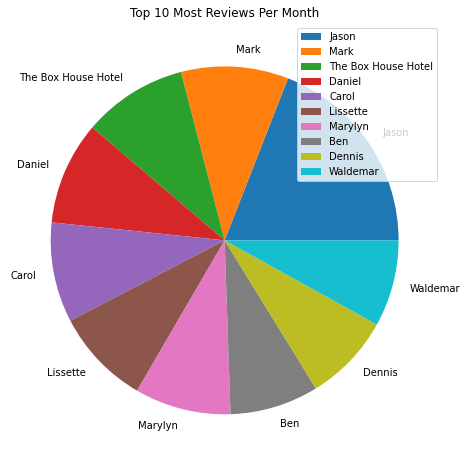

In [195]:
most_reviews.plot(kind='pie',figsize=(8, 8),subplots=True)

plt.title("Top 10 Most Reviews Per Month")
plt.ylabel("")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most expensive listings

Create a variable `expensive_listings_df` containing the top 100 most expensive per night listings. The most expensive should be at the top.

In [191]:
# your code goes here
expensive_listings_df = airbnb_df.sort_values(by='price', ascending=False).head(100)
expensive_listings_df


,listing_name,host_id,host_name,borough,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,,
174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,40.77350,-73.98697,Entire home/apt,200000.0,30,30,2018-05-05,0.33,11,0.0
273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,40.73301,-74.00268,Entire home/apt,130000.0,5,28,2018-09-25,0.31,4,297.0
250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,40.73129,-73.99944,Entire home/apt,85000.0,3,107,2019-05-23,1.15,1,249.0
19601,perfect for a family or small group,74303,Maggie,Brooklyn,40.69723,-73.99268,Entire home/apt,80000.0,1,25,2016-04-08,0.24,1,7.0
279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,40.68492,-73.95489,Entire home/apt,80000.0,4,122,2019-02-07,1.37,1,257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406926,Nolita apt. with private garden,2027134,Marie-Helene,Manhattan,40.72340,-73.99439,Entire home/apt,26900.0,28,81,2019-03-07,0.93,1,122.0
53477,3 floors of luxury!,204539,Mark,Queens,40.71546,-73.87854,Entire home/apt,26500.0,7,38,2019-04-27,0.38,5,365.0
435774,A REAL New Yorkers Wall St,2164138,Suzanne,Manhattan,40.70633,-74.00974,Entire home/apt,26500.0,4,33,2018-11-25,0.39,1,0.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has biggest amount of expensive listings?

Using the `expensive_listings_df` listings count the occurrences of each `neighbourhood` they belong.

In [196]:
# your code goes here
expensive_listings_df['borough'].value_counts()


 Manhattan    60
 Brooklyn     38
 Queens        2
Name: borough, dtype: int64

#### Visualizing neighbourhoods

<AxesSubplot:>

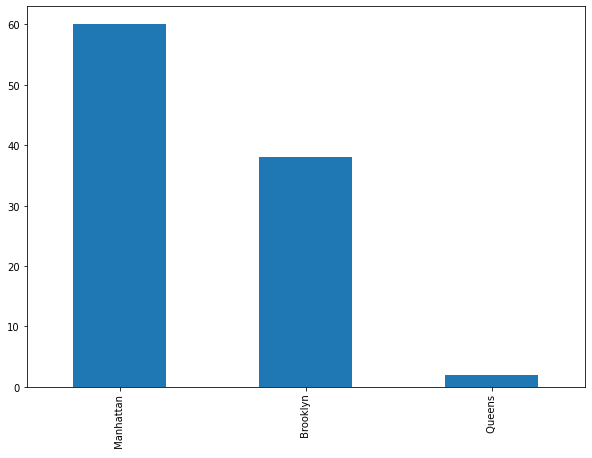

In [197]:
expensive_listings_df['borough'].value_counts().plot(kind='bar', figsize=(10,7))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has the most listings?

Using all the listings from `airbnb_df` count how many listings each neighbourhood has. Keep just the top 10 neighbourhoods with the most listings.

In [ ]:
# your code goes here



#### Visualizing neighbourhoods

In [ ]:
airbnb_df['neighbourhood'].value_counts().head(10).plot(kind='bar', figsize=(10,7))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)